https://www.tensorflow.org/tutorials/keras/classification 

## AI voorspelt kleding

Er wordt een neural LSTM model getraind op een dataset met afbeeldingen (28x28) die verschillende kledingstukken bevatten. Het doel is dat het model de grotere meerderheid van de test afbeeldingen goed kan voorspellen. <br>
Er wordt gebruik gemaakt van een mnist dataset die gevonden kan worden in de keras package. 

In [23]:
# All the import statements
import tensorflow as tf
from tensorflow.math import confusion_matrix
import keras
import numpy as np
import matplotlib.pyplot as plt
import cv2

De test- en trainingsdatasets worden ingeladen vanuitd de keras datasets package in python

In [24]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
train_images.shape

(60000, 28, 28)

In [25]:
train_labels.shape

(60000,)

De trainingsdatasets lijken naar verwachten even groot te zijn. De images bevat 60.000 28x28 afbeeldingen en labels bevat de getallen die naar een kledingstuk vertalen.

Een voorbeeld uit de trainingsdataset wordt weergegeven met de bijhorende kledinglabel

Op het plaatje staat een Sneaker.


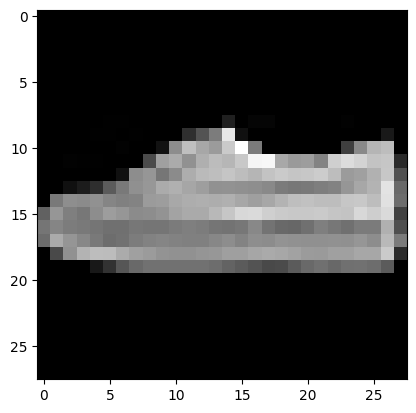

In [26]:
# The number in labels translate to a clothing
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# A random image is chosen
idx = np.random.choice(60_000)
img = np.array(train_images[idx], dtype='float')
label = train_labels[idx]
# Image and label is shown
plt.imshow(img.reshape(28,28), cmap='gray')
print(f'Op het plaatje staat een {class_names[label]}.')

Voor het gemak worden er op dezelfde manier meerdere kledingstukken naast elkaar weergegeven.

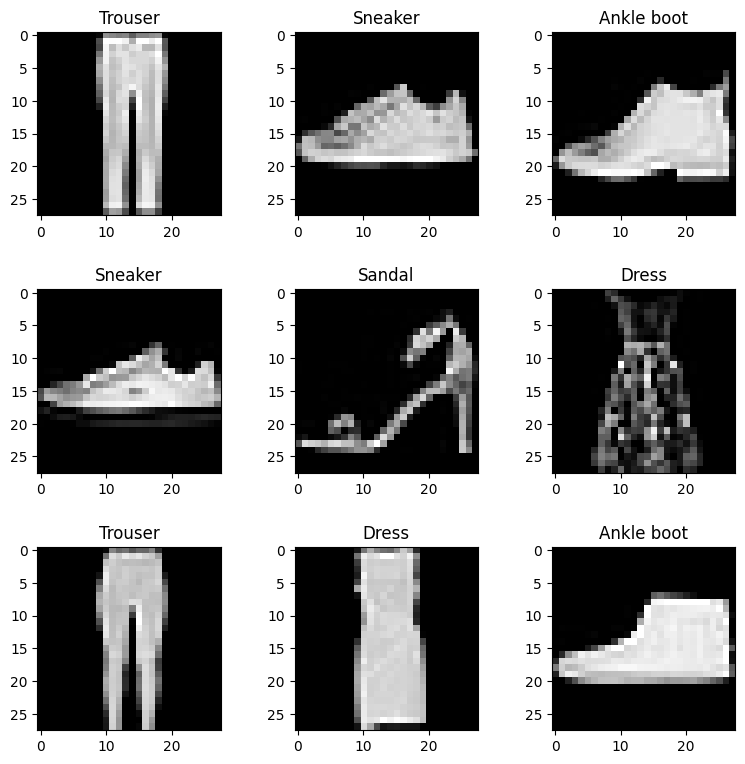

In [27]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(8,8))
for c in range(3):
    for r in range(3):
        idx = np.random.choice(60_000)
        img = np.array(train_images[idx], dtype='float')
        label = train_labels[idx]
        ax[c, r].imshow(img.reshape(28,28), cmap='gray')
        ax[c, r].set_title(class_names[label])
fig.tight_layout(pad=2)
plt.show()

Er wordt gekeken of de output van labels daadwerkelijk een getal is.

In [28]:
# Should be a number between the 0 and 9
train_labels[0]

9

Het LSTM neural network model wordt gemaakt, waarbij deze wordt gecompiled op de gewenste categorieën.

In [29]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),    # images are 28 x 28
    keras.layers.Dense(128, activation='relu'), # Could be lower for my computer
    keras.layers.Dense(10, activation="softmax") # Number between the 0 and 1
])

model.compile(optimizer=keras.optimizers.Adam(0.001),
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True), # from_logits=True
              metrics=[keras.metrics.SparseCategoricalAccuracy()])

Het model wordt getraind op de trainingsdatasets (images en labels)

In [30]:
hist = model.fit(train_images, train_labels, epochs=6, validation_data=(test_images, test_labels))

Epoch 1/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 9.5629 - sparse_categorical_accuracy: 0.6752 - val_loss: 0.7860 - val_sparse_categorical_accuracy: 0.7406
Epoch 2/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.6870 - sparse_categorical_accuracy: 0.7602 - val_loss: 0.7447 - val_sparse_categorical_accuracy: 0.7807
Epoch 3/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.5803 - sparse_categorical_accuracy: 0.7975 - val_loss: 0.5870 - val_sparse_categorical_accuracy: 0.8076
Epoch 4/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.5457 - sparse_categorical_accuracy: 0.8156 - val_loss: 0.6047 - val_sparse_categorical_accuracy: 0.8087
Epoch 5/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.5055 - sparse_categorical_accuracy: 0.8246 - val_loss: 0.5345 - val_sparse_categorical_accuracy: 0.8221
Epoch 6/6
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.4878 - sparse_categorical_accuracy: 0.8317 - val_loss: 0.5581 - val_sparse_categorical_accuracy: 0.816

Met de onderstaande plot wordt er gekeken naar de toegenomen accuracy, bij elke gevormde Epoch.

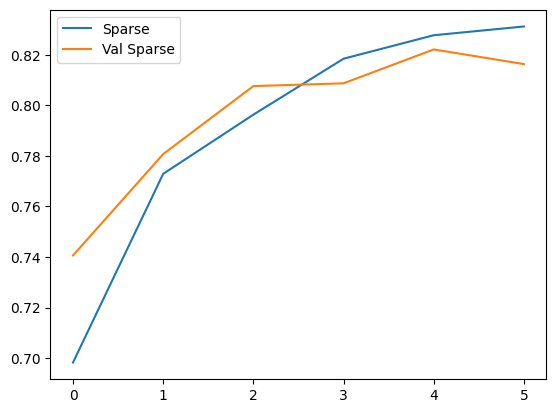

In [31]:
plt.plot(hist.history['sparse_categorical_accuracy'], label='Sparse')
plt.plot(hist.history['val_sparse_categorical_accuracy'], label='Val Sparse')
plt.legend()
plt.show()

Er wordt met een confusionmatrix gekeken naar het voorspellende vermogen van het model met de test (image) dataset. De resultaten wordt gecontroleerd met een de van tevoren vastgestelde labels in de confusionmatrix. <br>
Hierbij is de x-as de voorspelde resultaten (0 tot en met 9) en de y-as de daadwerkelijke labels (0 tot en met 9)

In [32]:
y_pred = model.predict(test_images)
confusion_matrix(np.argmax(y_pred, axis=1), test_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 714us/step


<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[749,   2,  10,  14,   0,   0, 127,   0,   3,   0],
       [  4, 949,   1,   9,   0,   3,   0,   0,   1,   0],
       [  5,   1, 758,   7, 170,   0, 112,   0,   3,   0],
       [103,  35,  18, 885,  39,   0,  75,   0,   8,   0],
       [  3,   2,  98,  42, 711,   0, 127,   0,   4,   0],
       [  0,   0,   0,   0,   0, 888,   0,  21,   3,  55],
       [134,  11, 114,  43,  80,   5, 556,   0, 109,   1],
       [  0,   0,   1,   0,   0,  70,   0, 970,   5, 111],
       [  2,   0,   0,   0,   0,  19,   3,   3, 864,   0],
       [  0,   0,   0,   0,   0,  15,   0,   6,   0, 833]])>

Het model is het slechtste in staat om het derde kledingstuk correct te voorspellen. 170 keer is het als het 5de kledingstuk voorspelt en 112 keer als het zevende kleding stuk. Het gaat hierbij om een pullover die als een coat of shirt wordt gezien. <br>
Nog steeds worden de meeste kledingstukken goed voorspelt door het model.

Met de onderstaande code wordt er gekeken naar de voorspelling van het model, bij een bepaalde afbeelding. Wanneer deze voorspelling incorrect is, wordt deze met rood aangegeven. Het kledingstuk tussen haakjes is voorspeld en hetgeen erbuiten is de daadwerkelijke kledingstuk. <br>
Een zwarte tekst/titel is een correcte voorspelling.

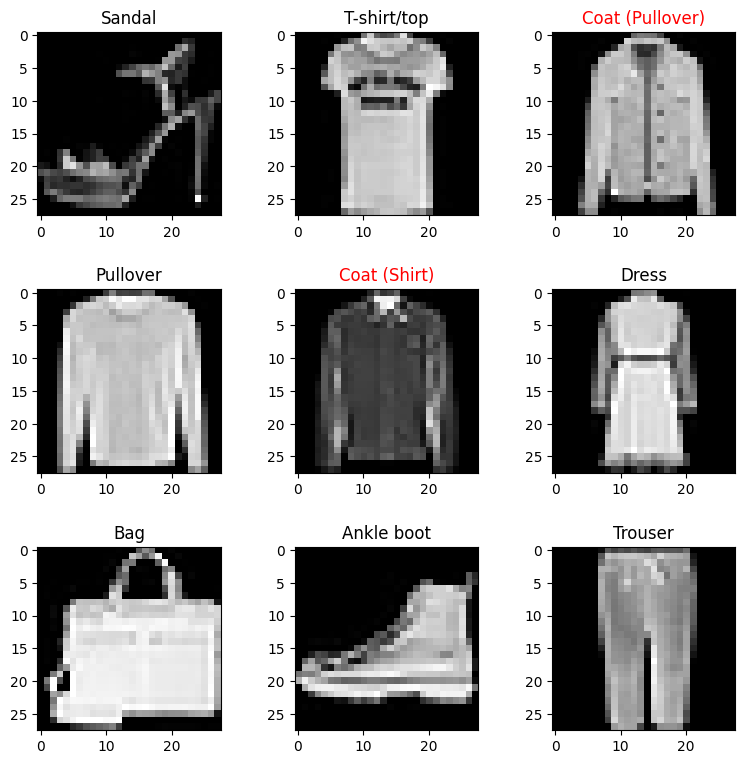

In [33]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(8,8))
# The comparison of actual/prediction is done nice times
for c in range(3):
    for r in range(3):
        # One out of the 10.000 test images is used
        idx = np.random.choice(10_000)
        img = np.array(test_images[idx], dtype='float')
        ax[c, r].imshow(img.reshape(28,28), cmap='gray')
        
        label_y = test_labels[idx]
        label_p = np.argmax(y_pred[idx])
        # The actual label is compared against the predicted label
        if label_y == label_p:
            # When correct, prediction is black
            ax[c, r].set_title(class_names[label_y])
        else:
            # Red + (predicion) vs actual clothing
            ax[c, r].set_title(f'{class_names[label_y]} ({class_names[label_p]})', c='r')
fig.tight_layout(pad=2)
plt.show()

Daarnaast kan met de onderstaande plot worden gekeken naar de berekende kansen op het kledingstuk, vanuit het model. Door dit meerdere keren te runnen kan gekeken worden naar hoe zeker het model van het kledingstuk is. <br>
Deze resultaten kunnen helpen bij mogelijk verdere verbeteringen van het model. Er kan namelijk worden gevonden welke voorspellingen moeilijk zijn voor het model, waaruit de verbeteringen kunnen worden aangebracht.

C:\Users\DemiS\AppData\Local\Temp\ipykernel_15116\396019594.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(cloths, rotation=90)


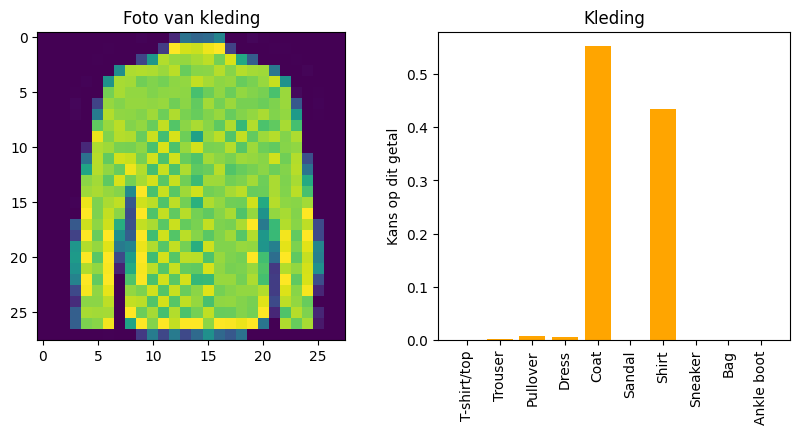

In [34]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,4))

numbers = range(10)
# The cloths are used as the x-axis
cloths = [class_names[num] for num in numbers]
# The count/chance are used as the y-axis
number = np.random.choice(10_000)
counts = y_pred[number].tolist()

# Make the barplot with the predictions
ax[1].bar(cloths, counts, color='orange')
# Rotate the x-axis labels by 90 degrees
ax[1].set_xticklabels(cloths, rotation=90)
ax[1].set_ylabel('Kans op dit getal')
ax[1].set_title('Kleding')
ax[0].set_title('Foto van kleding')
# Put the picture next to the barplot
ax[0].imshow(test_images[number])

plt.show()

Er wordt tot slot gekeken hoe het model een voorspelling tot op een afbeelding dat niet (alleen) een kledingstuk is.

Eerst wordt er een afbeelding van Giel ingeladen als een 28x28 afbeelding.

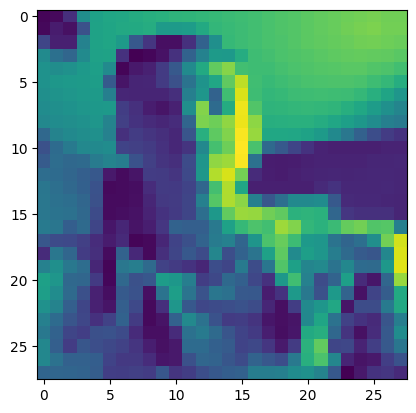

In [35]:
im = cv2.imread("giel.jpg")
im = im[:,:,1]

# Resize the image to 28x28 pixels
im_resized = cv2.resize(im, (28, 28), interpolation=cv2.INTER_AREA)

plt.imshow(im_resized)

Er wordt een voorspelling gedaan met het model op de afbeelding van Giel.

In [36]:
x = model.predict(np.array([im_resized]))
sum(x[0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


1.000000024214387

Tot slot wordt er gekeken naar welke kledingstukken het meeste lijken op de afbeelding van Giel, volgens het gemaakte model.

C:\Users\DemiS\AppData\Local\Temp\ipykernel_15116\1858051899.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(cloths, rotation=90)


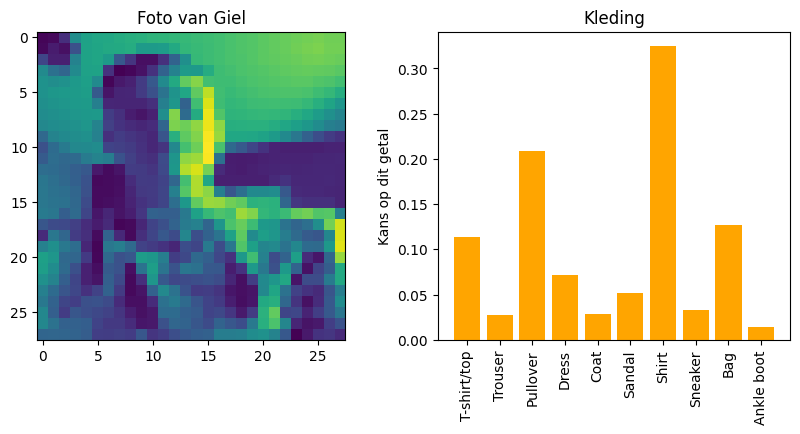

In [37]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,4))

numbers = range(10)
# The cloths are used as the x-axis
cloths = [class_names[num] for num in numbers]
# The count/chance are used as the y-axis
counts = x[0].tolist()

# Make the barplot with the predictions
ax[1].bar(cloths, counts, color='orange')
# Rotate the x-axis labels by 90 degrees
ax[1].set_xticklabels(cloths, rotation=90)
ax[1].set_ylabel('Kans op dit getal')
ax[1].set_title('Kleding')
ax[0].set_title('Foto van Giel')
# Put the picture next to the barplot
ax[0].imshow(im_resized)

plt.show()

Blijkbaar lijkt Giel het meeste op een Pullover of een Shirt. Dit zou in theorie kunnen komen doordat deze zichtbaar is op de gemaakte foto, aangezien alle voetbedekking, een tas, broek of jurk een kleinere kans hebben. Maar Giel zou er ook gewoon het meest op kunnen lijken ;)